# Esercitazione 4 - 11 Marzo 2025
 

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [39]:
import sys
import numpy as np
import matplotlib.pyplot as plt
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [28]:
p=52
t=53
beta=2.0
spacing=beta**(p+1-t)
x=2.0**52
y=x+spacing
print(x,y)
z=x+0.5
q=y+0.5
print(z,q)
print(spacing, np.spacing(2**52))

4503599627370496.0 4503599627370497.0
4503599627370496.0 4503599627370498.0
1.0 1.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [12]:
c=2*(beta-1)*(beta**(t-1))*(sys.float_info.max_exp-sys.float_info.min_exp+1)+1
c

1.842872967520007e+19

- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[2^0, 2^1]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$.

In [20]:
p=0
t=53
beta=2
spacing=beta**(p+1-t)
esp=2**(-52)
print(spacing, esp, 1.0, 1.0+spacing)

2.220446049250313e-16 2.220446049250313e-16 1.0 1.0000000000000002


- **4.** Siano $a=0.1234567890123400 e+16$, $b=-0.1234567890123401 e+16$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [29]:
a=0.1234567890123400e+16
b=-0.1234567890123401e+16
c=0.06
d=(a+b)+c
e=(a+c)+b
f=a+(b+c)
print(d,e,f)
#spacing of a number in its interval
print(np.spacing(a))

a=0.23371258e-4
b=0.33678429e+2
c=-0.33677911e+2
d=(a+b)+c
e=(a+c)+b
f=a+(b+c)
print(d,e,f)
print(np.spacing(a))

-0.94 -1.0 -1.0
0.25
0.0005413712580022434 0.0005413712580022434 0.0005413712579995743
3.3881317890172014e-21


- **5** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [36]:
x=[0.1 for i in range(0,10)]
sum=0
for i in x:
    sum+=i
print(sum, np.sum(x))

0.9999999999999999 1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [33]:
f=lambda x: np.sqrt(x**2+1)-x
g=lambda x: 1/(np.sqrt(x**2+1)+x)
print(f(7777), f(77777777))
print(g(7777), g(77777777))

6.429214317904552e-05 0.0
6.429214323431402e-05 6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

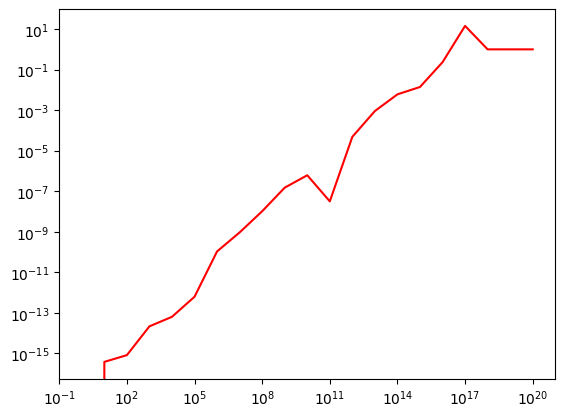

In [56]:
A=lambda x: 1/x - 1/(x+1)
B=lambda x: 1/(x*(x+1))
nums=[10**i for i in range(0,21)]
#for i in nums:
#    print(i)
#print(nums)
alpha=[B(x) for x in nums]
flalpha=[A(x) for x in nums]
#print(flalpha, alpha)
#for i in range (0,len(nums)):
#    print(alpha[i]==flalpha[i])
relErrors=[np.abs(alpha[i]-flalpha[i])/np.abs(alpha[i]) for i in range(0,len(nums))]
plt.loglog(nums, relErrors, 'r-')

- **8.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.